In [2]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

Install/update python, then install the following python libs:

- pip install opencv-contrib-python (computer vision lib used for image editing (contrib installs all contributions))
- pip install tensorflow            (used for working with deep-learning networks)
- pip install numpy                 (used for working with matrices)
- pip install matplotlib            (this is used to visualize digits and points like MATLAB (optional))
- Also install the Black Formatter extension for python formatting on save (equivalent of prettier for js)
- To run this file, cd to Handwritting_recognizer then run: **python src/main.py**

In [ ]:
# First we will load the dataset directly from tf module instead of downloading csv files and pre-processing them
mnist = tf.keras.datasets.mnist

- Now during training we have labelled data meaning we know what digit each picture corresponds to
- We split the labelled data into two parts: 1. Training data (80% of labelled data), 2. Testing data (20%)
- But in this case we use the load data function from mnist dataset which is already 80:20 splitted
- x-data refers to the actual image as a flattened matric of pixels (it's just the pixel data)
- y-data refers to the labelled digit i.e. what digit the image actually is

In [ ]:
# this function returns two tuples (destructuring)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- Now we will normalize it meaning scale it down between 0 and 1, e.g. grayscale intensity value is between 0 to 255
- On normalizing it we get between 0 and 1
- Keep in mind we only wanna normalize the pixel values and not the labelling digits to make it easier for neural network
- to do the calculations

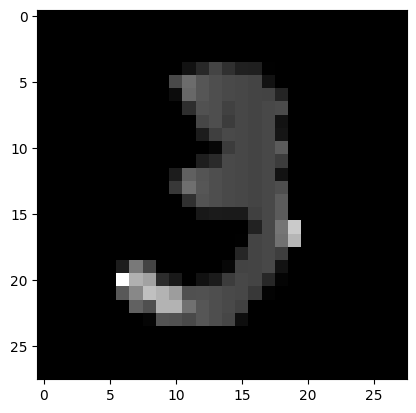

In [75]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[10], cmap="gray")
plt.show()
# print(x_train[0])

Also take a look at from the README.md file:
- Activation functions
- Optimizers
- Loss functions
- Layer types

#### <i>Building the model by adding layers, compiling, fitting (training) and saving the model</i>

In [ ]:
# Now the pre-processing part is over, now we will build the model and train it
model = tf.keras.models.Sequential()  # Just a basic sequential neural network

# Now we add each layer to our model using model.add(layerType) function
# A flatten layer takes a p x q matrix and flattens it out into a list/array of p x q elements | Input layer

# here the mnist dataset is in 28x28 pixels so we use 28x28 matrix
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # first layer

# Dense layer definition in README.md | We will be adding two dense layers
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))

# Now we will be adding the Output layer with ten neurons cause 10 digits = 10 possible outputs
# Softmax Activation Function definition in README.md file
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Now we gotta compile the model into binary for computer to actually understand and execute it
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Now we need to train the model
# epochs is how many times is the model going to see the same data all over again, standard 10-20 epochs
# 10 epochs gives 99.5% accuracy and beyond that starts to slightly overfit due to diminishing returns
model.fit(x_train, y_train, epochs=10)

# After training the model we need to save it
model.save("./models/handwritten.model")

#### <i>Loading the model, testing and prediction:</i>

In [3]:
ready_model = tf.keras.models.load_model("../models/handwritten.model")

# loss, accuracy = ready_model.evaluate(x_test, y_test)

# print(f"Loss = {loss}")  # 0.1% loss found
# print(f"Accuracy = {accuracy}")  # 97% accuracy found

image_number = 1

while os.path.isfile(f"../test/digit{image_number}.png"):
    try:
        img = cv.imread(f"../test/digit{image_number}.png")[:, :, 0]
        # inv_img = 1 - (img/255) # inverted image
        # inv_img = np.array([inv_img], dtype="float32")
        # print(inv_img)
        img = np.invert(np.array([img]))
        # plt.imshow(img[0], cmap="gray")
        # plt.show()
        # print(img/255)
        img = img/255
        prediction = ready_model.predict(img, batch_size=1)
        print(f"Digit {image_number} is probably a {np.argmax(prediction)}")
    except:
        print("Some error occured")
    finally:
        image_number += 1

1/1 [==============================] - 1s 603ms/step
Digit 1 is probably a 3
1/1 [==============================] - 0s 89ms/step
Digit 2 is probably a 3
1/1 [==============================] - 0s 39ms/step
Digit 3 is probably a 2
1/1 [==============================] - 0s 60ms/step
Digit 4 is probably a 9
1/1 [==============================] - 0s 33ms/step
Digit 5 is probably a 8
1/1 [==============================] - 0s 48ms/step
Digit 6 is probably a 3


In [ ]:
# checking the current working directory
print(os.getcwd())